In [85]:
from nptdms import TdmsFile as TF
import sys, os
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [43]:
def create_tcdict(filepaths, loadfn, prefix = None ):
    """takes in a list of files and a load function, and creates a dict of a df for each file. If a prefix is passed, that is removed from the filename (typically the instrument name so only the test case is left as the dict key)"""

    dfs = {}

    for filepath in filepaths:
        filename = os.path.split(filepath)[1]
        testcase = os.path.splitext(filename)[0]

        if prefix != None:
            testcase = _remove_prefix(testcase,prefix)

        df =  loadfn(filepath)
        dfs[testcase] =df
    
    return dfs

In [59]:
def ocop2df(filepath,):
    file = TF(filepath)
    df = file.object(file.groups()[2]).as_dataframe()
    df.index = file.object('Global', "Wavelength").data
    indexarr = list(zip(*[file.object('Global', 'MP Pos').data,file.object('Global', 'Time').data]))
    df.columns = pd.MultiIndex.from_tuples(indexarr, names = ['MP','Wavelength'])
    print(filepath)
    return df

In [76]:
T = [1039, 1050, 1145, 1180, 1200]
Spcm = ['Flame', 'NIRQuest512']
names = []
filenames = []
path = '/Measure/'
for t in T:
    for s in Spcm:
        names.append(s+'_'+str(t)+'C')
        filenames.append((path+s+'_'+str(t)+'C.tdms'))

In [66]:
dfs = create_tcdict(filenames, ocop2df)

/anaconda3/lib/python3.6/site-packages/nptdms/tdms.py:772: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  for ch in self.tdms_file.group_channels(self.group)])


/Measure/Flame_1039C.tdms
/Measure/NIRQuest512_1039C.tdms
/Measure/Flame_1050C.tdms
/Measure/NIRQuest512_1050C.tdms
/Measure/Flame_1145C.tdms
/Measure/NIRQuest512_1145C.tdms
/Measure/Flame_1180C.tdms
/Measure/NIRQuest512_1180C.tdms
/Measure/Flame_1200C.tdms
/Measure/NIRQuest512_1200C.tdms


<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

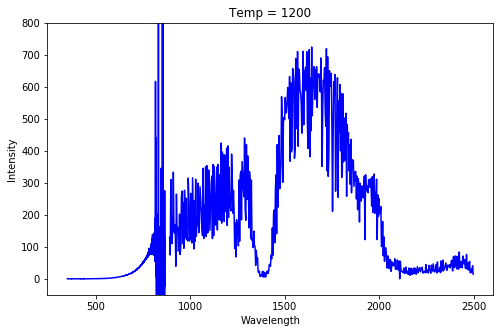

In [172]:
for temp in T:
    image.clear()
    image = plt.figure(figsize=(8,5))
    plt.plot(dfs[Spcm[0]+'_'+str(temp)+'C'][0].mean(axis=1), c='b')
    plt.plot(dfs[Spcm[1]+'_'+str(temp)+'C'][1].mean(axis=1), c='b')
    plt.title('Temp = ' + str(temp))
    plt.ylabel('Intensity')
    plt.xlabel('Wavelength')
    plt.ylim(-50,800)
    image.savefig('MgO Black Body Curve T='+str(temp))

(-50, 500)

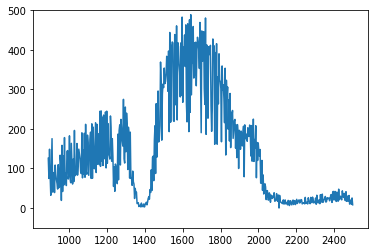

In [128]:
plt.plot(dfs[names[5]][1].mean(axis=1))
plt.ylim(-50,500)

In [113]:
dfs[names[0]].columns

MultiIndex(levels=[[-1, 0, 1], [2018-10-15 20:49:18.431037+00:00, 2018-10-15 20:49:18.850037+00:00, 2018-10-15 20:49:19.252037+00:00, 2018-10-15 20:49:19.652037+00:00, 2018-10-15 20:49:20.052037+00:00, 2018-10-15 20:49:20.452037+00:00, 2018-10-15 20:49:20.853037+00:00, 2018-10-15 20:49:21.253037+00:00, 2018-10-15 20:49:21.653037+00:00, 2018-10-15 20:49:22.053037+00:00, 2018-10-15 20:49:22.453037+00:00, 2018-10-15 20:49:22.853037+00:00, 2018-10-15 20:49:23.253037+00:00, 2018-10-15 20:49:23.653037+00:00, 2018-10-15 20:49:24.053037+00:00, 2018-10-15 20:49:24.453037+00:00, 2018-10-15 20:49:24.853037+00:00, 2018-10-15 20:49:25.253037+00:00, 2018-10-15 20:49:25.653037+00:00, 2018-10-15 20:49:26.054037+00:00, 2018-10-15 20:49:26.455037+00:00, 2018-10-15 20:49:26.855037+00:00, 2018-10-15 20:49:27.255037+00:00, 2018-10-15 20:49:27.655037+00:00, 2018-10-15 20:49:28.055037+00:00, 2018-10-15 20:49:28.455037+00:00, 2018-10-15 20:49:28.855037+00:00, 2018-10-15 20:49:29.255037+00:00, 2018-10-15 20:49